In [2]:
pwd

'/Users/benrosand/oct-qiskit-pulse'

In [3]:
import copy
import numpy as np
from qiskit import Aer, IBMQ, execute, QuantumCircuit, circuit, pulse, transpile, schedule, assemble
from qiskit.providers.aer.pulse.system_models.pulse_system_model import PulseSystemModel
from qiskit.providers.aer.backends import PulseSimulator
from qiskit.pulse import Play, Waveform
# import matplotlib.pyplot as plt
from src.QOCInstructionScheduleMap import QOCInstructionScheduleMap
from src.QutipOptimizer import QutipOptimizer
# from qiskit import IBMQ
# from qiskit.circuit.quantumcircuit import QuantumCircuit
# import qiskit
# from qiskit.compiler.assemble import assemble
# from qiskit.tools.monitor.job_monitor import job_monitor
# from qiskit.circuit.library import XGate

In [ ]:
subsystem_list = [0]
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
backend = provider.get_backend('ibmq_armonk')

In [6]:
config = backend.configuration()
defaults = backend.defaults()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
hamiltonian = config.hamiltonian
print(hamiltonian['h_str'])
print(hamiltonian['osc'])
print(hamiltonian['vars'])

['_SUM[i,0,0,wq{i}/2*(I{i}-Z{i})]', '_SUM[i,0,0,delta{i}/2*O{i}*O{i}]', '_SUM[i,0,0,-delta{i}/2*O{i}]', '_SUM[i,0,0,omegad{i}*X{i}||D{i}]']
{}
{'delta0': -2.1895185763064315, 'omegad0': 0.036498982065279365, 'wq0': 31.255360497293033}
/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
config.dt

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.2222222222222221e-10

## QOC map

In [9]:
backend.configuration().hamiltonian['vars']['delta0'] = -3.3
backend.configuration().hamiltonian['vars']['omegad0'] = backend.configuration().hamiltonian['vars']['omegad0']*2
# new_hamiltonian['vars']['delta0'] = -330e7
grape_optimizer = QutipOptimizer(backend, n_ts=96)
 
builtin_instructions = backend.defaults().instruction_schedule_map
grape_inst_map = QOCInstructionScheduleMap.from_inst_map(grape_optimizer,
                                                         builtin_instructions,
                                                         ['measure'])


/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Original Model

In [10]:
orig_model = PulseSystemModel.from_backend(backend)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
pulse_list = [[ 0.15636018, -0.61700222],
       [ 0.16641606, -0.58439758],
       [ 0.17933696, -0.54938641],
       [ 0.19418189, -0.51251377],
       [ 0.21007213, -0.47427551],
       [ 0.22621628, -0.4351172 ],
       [ 0.24192662, -0.39543451],
       [ 0.25662725, -0.35557444],
       [ 0.26985532, -0.31583729],
       [ 0.28125659, -0.27647894],
       [ 0.29057673, -0.23771346],
       [ 0.29764999, -0.19971594],
       [ 0.30238625, -0.16262553],
       [ 0.30475764, -0.12654864],
       [ 0.30478555, -0.09156231],
       [ 0.30252849, -0.05771775],
       [ 0.29807124, -0.025044  ],
       [ 0.29151547,  0.00644838],
       [ 0.28297184,  0.03676363],
       [ 0.2725536 ,  0.06591706],
       [ 0.26037153,  0.09393162],
       [ 0.24653007,  0.12083449],
       [ 0.23112461,  0.14665404],
       [ 0.21423963,  0.17141698],
       [ 0.19594772,  0.19514598],
       [ 0.17630921,  0.21785747],
       [ 0.15537246,  0.23956005],
       [ 0.13317462,  0.26025313],
       [ 0.10974283,  0.27992613],
       [ 0.0850959 ,  0.29855814],
       [ 0.0592462 ,  0.31611801],
       [ 0.03220204,  0.33256507],
       [ 0.00397017,  0.34785032],
       [-0.0254414 ,  0.36191828],
       [-0.0560204 ,  0.3747095 ],
       [-0.08774728,  0.38616368],
       [-0.12059205,  0.39622355],
       [-0.15451133,  0.40483942],
       [-0.18944547,  0.41197437],
       [-0.22531603,  0.41761013],
       [-0.2620238 ,  0.42175327],
       [-0.29944721,  0.42444175],
       [-0.33744163,  0.42575142],
       [-0.37583933,  0.42580205],
       [-0.41445028,  0.42476247],
       [-0.45306388,  0.42285432],
       [-0.4914513 ,  0.42035356],
       [-0.52936856,  0.41758943],
       [-0.55952765,  0.41494163],
       [-0.56976281,  0.41277294],
       [-0.57900885,  0.4113632 ],
       [-0.58732233,  0.41098188],
       [-0.5947804 ,  0.41192445],
       [-0.60147306,  0.41451508],
       [-0.60749476,  0.41910761],
       [-0.61293635,  0.42608357],
       [-0.61787866,  0.43584569],
       [-0.62238898,  0.44880592],
       [-0.62652169,  0.46536685],
       [-0.63032401,  0.48589616],
       [-0.63384722,  0.51069442],
       [-0.63716305,  0.53995762],
       [-0.64038373,  0.57373696],
       [-0.64368268,  0.6118996 ]]



/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
pl = [complex(a[0], a[1]) for a in pulse_list]

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
sched = pulse.Schedule()
sched += Play(Waveform(pl),pulse.DriveChannel(0))

from qiskit.scheduler import measure
sched += measure([0], backend) << sched.duration

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-acc8875de847>:5: DeprecationWarning: "measure" has been moved to "qiskit.pulse.macros"
  sched += measure([0], backend) << sched.duration


In [14]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# sched = schedule(transpile(qc, backend), backend)#, inst_map=grape_inst_map)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
sim = PulseSimulator()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
hamiltonian['vars']['omegad0']

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.07299796413055873

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


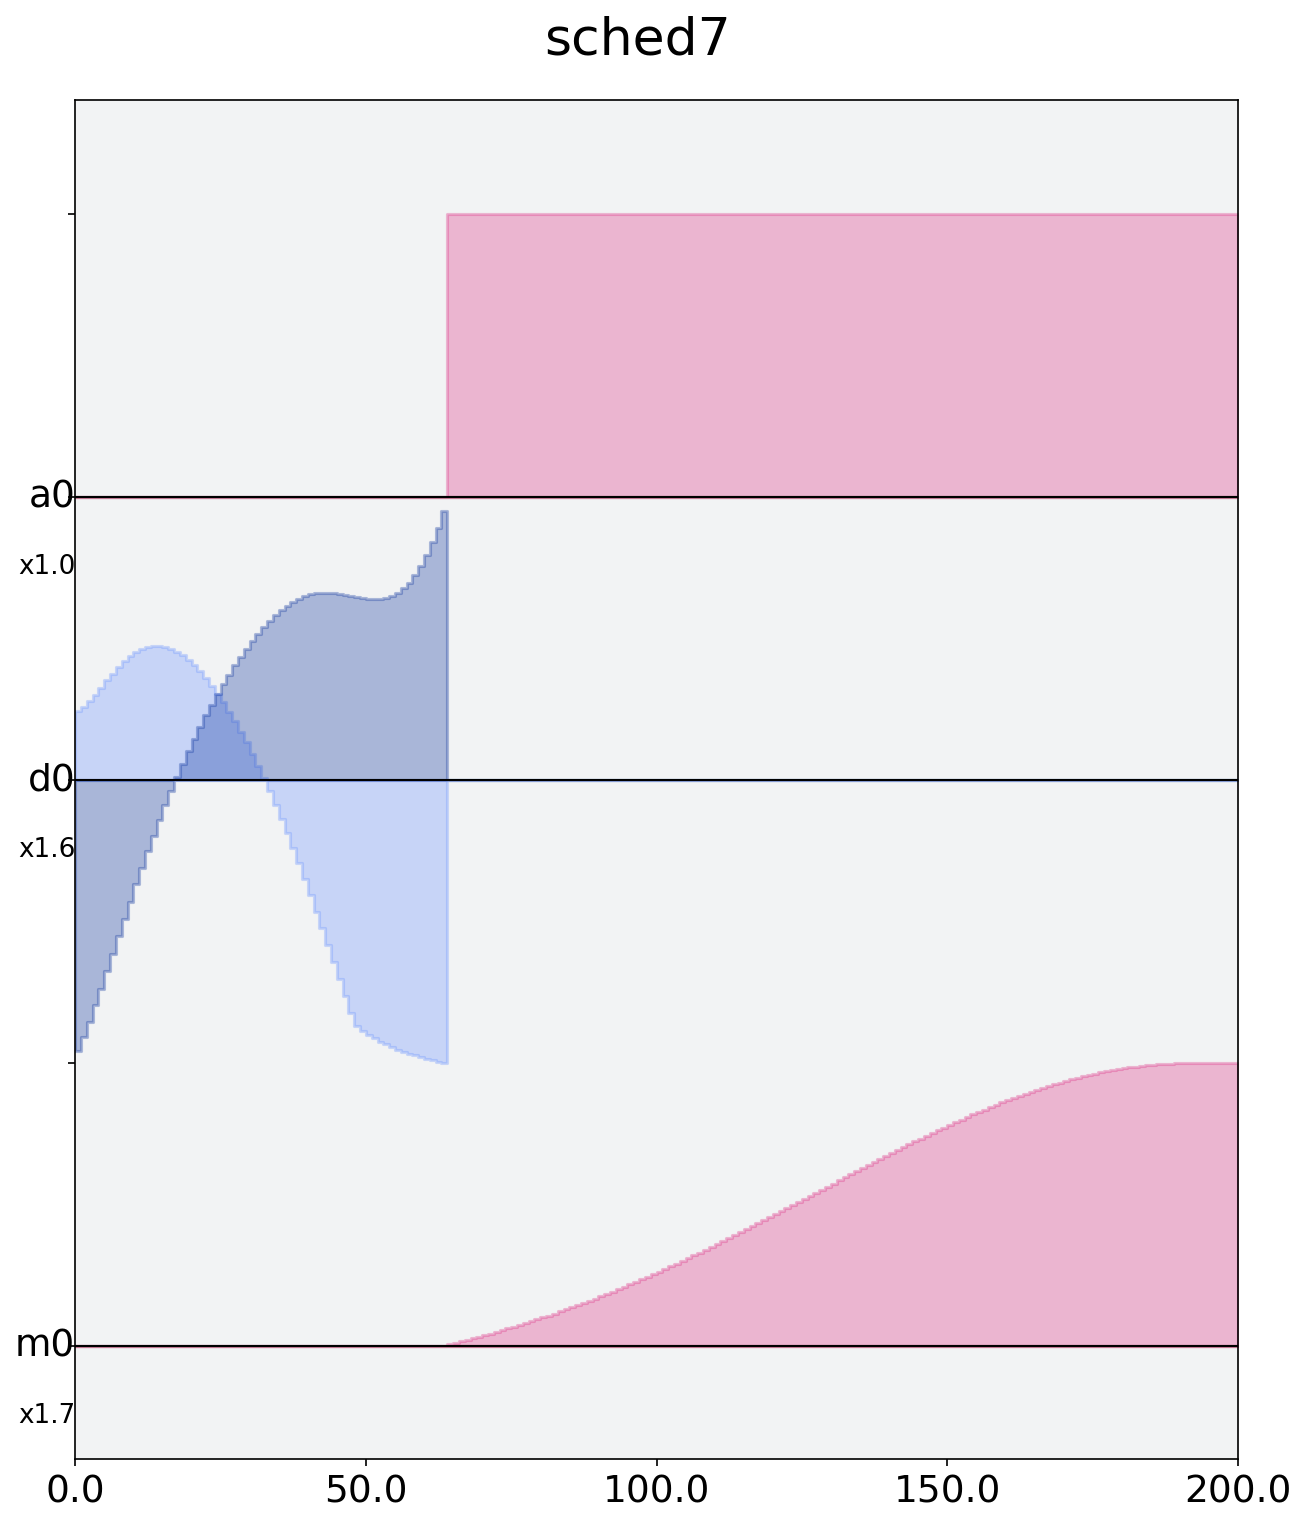

In [18]:
sched.draw(plot_range=[0,200])

In [17]:
qobj = assemble(sched, backend=sim)
real_qobj = assemble(sched, backend=backend)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
job = sim.run(qobj, system_model=orig_model)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
result = job.result()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
result.get_counts()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'0': 1024}

## Modified Model

In [21]:
new_backend = copy.deepcopy(backend)
new_config = new_backend.configuration()
new_defaults = new_backend.defaults()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
new_hamiltonian = new_config.hamiltonian

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Modifications

In [23]:
new_hamiltonian['vars'] = {k: v*1e9 for k, v in new_hamiltonian['vars'].items()}
new_hamiltonian['qub'] = {k: 3 for k in new_hamiltonian['qub'].keys()}
new_hamiltonian['vars']['omegad0'] = new_hamiltonian['vars']['omegad0']*2
new_hamiltonian['vars']['delta0'] = -330e7

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
hamiltonian = config.hamiltonian
print(new_hamiltonian['h_str'])
print(new_hamiltonian['osc'])
print(new_hamiltonian['qub'])
print(new_hamiltonian['vars'])

['_SUM[i,0,0,wq{i}/2*(I{i}-Z{i})]', '_SUM[i,0,0,delta{i}/2*O{i}*O{i}]', '_SUM[i,0,0,-delta{i}/2*O{i}]', '_SUM[i,0,0,omegad{i}*X{i}||D{i}]']
{}
{'0': 3}
{'delta0': -3300000000.0, 'omegad0': 145995928.26111746, 'wq0': 31255360497.293034}
/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
new_model = PulseSystemModel.from_backend(new_backend)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
job = sim.run(qobj, system_model=new_model)
# real_job = backend.run(real_qobj)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
result = job.result()
# real_result = real_job.result()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
result.get_counts()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'0': 981, '1': 43}

In [29]:
real_result.get_counts()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'real_result' is not defined

In [30]:
new_defaults.qubit_freq_est

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[4974445121.263346]

# 2Q Backend

## Original

In [31]:
backend_2q = provider.get_backend('ibmq_manhattan')

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
orig_config_2q = backend_2q.configuration()
orig_defaults_2q = backend_2q.defaults()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
orig_model_2q = PulseSystemModel.from_backend(backend_2q, subsystem_list=[0, 1])

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
orig_hamiltonian_2q = orig_config_2q.hamiltonian
print(orig_hamiltonian_2q['h_str'])
print(orig_hamiltonian_2q['osc'])
print(orig_hamiltonian_2q['vars'])

['_SUM[i,0,64,wq{i}/2*(I{i}-Z{i})]', '_SUM[i,0,64,delta{i}/2*O{i}*O{i}]', '_SUM[i,0,64,-delta{i}/2*O{i}]', '_SUM[i,0,64,omegad{i}*X{i}||D{i}]', 'jq42q43*Sp42*Sm43', 'jq42q43*Sm42*Sp43', 'jq22q23*Sp22*Sm23', 'jq22q23*Sm22*Sp23', 'jq36q37*Sp36*Sm37', 'jq36q37*Sm36*Sp37', 'jq28q29*Sp28*Sm29', 'jq28q29*Sm28*Sp29', 'jq53q60*Sp53*Sm60', 'jq53q60*Sm53*Sp60', 'jq61q62*Sp61*Sm62', 'jq61q62*Sm61*Sp62', 'jq5q6*Sp5*Sm6', 'jq5q6*Sm5*Sp6', 'jq8q9*Sp8*Sm9', 'jq8q9*Sm8*Sp9', 'jq34q35*Sp34*Sm35', 'jq34q35*Sm34*Sp35', 'jq18q19*Sp18*Sm19', 'jq18q19*Sm18*Sp19', 'jq23q26*Sp23*Sm26', 'jq23q26*Sm23*Sp26', 'jq0q10*Sp0*Sm10', 'jq0q10*Sm0*Sp10', 'jq51q54*Sp51*Sm54', 'jq51q54*Sm51*Sp54', 'jq59q60*Sp59*Sm60', 'jq59q60*Sm59*Sp60', 'jq30q31*Sp30*Sm31', 'jq30q31*Sm30*Sp31', 'jq46q47*Sp46*Sm47', 'jq46q47*Sm46*Sp47', 'jq31q32*Sp31*Sm32', 'jq31q32*Sm31*Sp32', 'jq63q64*Sp63*Sm64', 'jq63q64*Sm63*Sp64', 'jq49q50*Sp49*Sm50', 'jq49q50*Sm49*Sp50', 'jq1q2*Sp1*Sm2', 'jq1q2*Sm1*Sp2', 'jq16q17*Sp16*Sm17', 'jq16q17*Sm16*Sp17', 'j

In [35]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.measure([0, 1], [0, 1])

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
channels_to_drop = ([pulse.AcquireChannel(i) for i in range(2, orig_config_2q.n_qubits)]+
                    [pulse.MeasureChannel(i) for i in range(2, orig_config_2q.n_qubits)]+
                    [pulse.ControlChannel(0), pulse.ControlChannel(4), pulse.ControlChannel(21)])

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
bell_sched = schedule(transpile(bell, backend_2q), backend_2q, inst_map=grape_inst_map).exclude(channels=channels_to_drop)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:qutip.control.dynamics:Setting memory optimisations for level 0
INFO:qutip.control.dynamics:Internal operator data type choosen to be <class 'numpy.ndarray'>
INFO:qutip.control.dynamics:phased dynamics generator caching True
INFO:qutip.control.dynamics:propagator gradient caching True
INFO:qutip.control.dynamics:eigenvector adjoint caching True
INFO:qutip.control.dynamics:use sparse eigen decomp False
INFO:qutip.control.pulseoptim:System configuration:
Drift Hamiltonian:
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [ 0.   0.  -3

TypeError: only length-1 arrays can be converted to Python scalars

In [38]:
bell_qobj = assemble(bell_sched, backend=sim)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'bell_sched' is not defined

In [39]:
job = sim.run(bell_qobj, system_model=orig_model_2q)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'bell_qobj' is not defined

In [40]:
result = job.result()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
result.get_counts()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'0': 981, '1': 43}

## Modified Model

In [42]:
new_backend_2q = copy.deepcopy(backend_2q)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
new_config_2q = new_backend_2q.configuration()
new_defaults_2q = new_backend_2q.defaults()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
new_hamiltonian_2q = new_config_2q.hamiltonian
print(new_hamiltonian_2q['h_str'])
print(new_hamiltonian_2q['osc'])
print(new_hamiltonian_2q['vars'])

['_SUM[i,0,64,wq{i}/2*(I{i}-Z{i})]', '_SUM[i,0,64,delta{i}/2*O{i}*O{i}]', '_SUM[i,0,64,-delta{i}/2*O{i}]', '_SUM[i,0,64,omegad{i}*X{i}||D{i}]', 'jq42q43*Sp42*Sm43', 'jq42q43*Sm42*Sp43', 'jq22q23*Sp22*Sm23', 'jq22q23*Sm22*Sp23', 'jq36q37*Sp36*Sm37', 'jq36q37*Sm36*Sp37', 'jq28q29*Sp28*Sm29', 'jq28q29*Sm28*Sp29', 'jq53q60*Sp53*Sm60', 'jq53q60*Sm53*Sp60', 'jq61q62*Sp61*Sm62', 'jq61q62*Sm61*Sp62', 'jq5q6*Sp5*Sm6', 'jq5q6*Sm5*Sp6', 'jq8q9*Sp8*Sm9', 'jq8q9*Sm8*Sp9', 'jq34q35*Sp34*Sm35', 'jq34q35*Sm34*Sp35', 'jq18q19*Sp18*Sm19', 'jq18q19*Sm18*Sp19', 'jq23q26*Sp23*Sm26', 'jq23q26*Sm23*Sp26', 'jq0q10*Sp0*Sm10', 'jq0q10*Sm0*Sp10', 'jq51q54*Sp51*Sm54', 'jq51q54*Sm51*Sp54', 'jq59q60*Sp59*Sm60', 'jq59q60*Sm59*Sp60', 'jq30q31*Sp30*Sm31', 'jq30q31*Sm30*Sp31', 'jq46q47*Sp46*Sm47', 'jq46q47*Sm46*Sp47', 'jq31q32*Sp31*Sm32', 'jq31q32*Sm31*Sp32', 'jq63q64*Sp63*Sm64', 'jq63q64*Sm63*Sp64', 'jq49q50*Sp49*Sm50', 'jq49q50*Sm49*Sp50', 'jq1q2*Sp1*Sm2', 'jq1q2*Sm1*Sp2', 'jq16q17*Sp16*Sm17', 'jq16q17*Sm16*Sp17', 'j

### Modifications

In [45]:
new_hamiltonian_2q['vars'] = {k: v*1e9 for k, v in new_hamiltonian_2q['vars'].items()}
new_hamiltonian_2q['qub'] = {k: 3 for k in new_hamiltonian_2q['qub'].keys()}
new_hamiltonian_2q['vars']['omegad0'] = new_hamiltonian_2q['vars']['omegad0']*2
new_hamiltonian_2q['vars']['omegad1'] = new_hamiltonian_2q['vars']['omegad1']*2
new_hamiltonian_2q['vars']['jq0q1'] = 2*new_hamiltonian_2q['vars']['jq0q1']
new_hamiltonian_2q['vars']['jq0q1']

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


24586252.644960392

In [46]:
new_model_2q = PulseSystemModel.from_backend(new_backend_2q, subsystem_list=[0, 1])

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
bell_qobj = assemble(bell_sched, backend=sim)
job = sim.run(bell_qobj, system_model=new_model_2q)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'bell_sched' is not defined

In [48]:
bell_sched.draw()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'bell_sched' is not defined

In [49]:
result = job.result()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
result.get_counts()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'0': 981, '1': 43}

In [51]:
exps = []
n_exps = 25
amps = np.linspace(0, 1.0, n_exps)
for amp in amps:
    with pulse.build(backend_2q) as exp:
        pulse.play(pulse.GaussianSquare(duration=736, amp=amp, sigma=64, width=480), pulse.ControlChannel(2))
        pulse.barrier(0)
        pulse.measure_all()
    exps.append(exp.exclude(channels=channels_to_drop))

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
cr_rabi = assemble(exps, backend=sim)
job = sim.run(cr_rabi, system_model=new_model_2q)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
result = job.result()

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
counts = [result.get_counts(i).get('01', 0) for i in range(n_exps)]

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
plt.plot(amps,counts)

/Users/benrosand/anaconda3/envs/qoc/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'plt' is not defined